<a href="https://colab.research.google.com/github/kochemazowd/RecyclerView_Program/blob/master/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#загрузка модулей
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [0]:
(img_train, answ_train), (img_test, answ_test) = fashion_mnist.load_data() #загрузка данных из набора fashion MNIST

In [0]:
types = ['футболка', 'брюки', 'свитер', 'платье', 'верхняя одежда', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

In [0]:
img_train = img_train.reshape(60000, 784) #выполняем предварительную обработку данных
img_test = img_test.reshape(10000, 784)

In [0]:
img_train = img_train / 255 #нормализация данных
img_test = img_test / 255 

In [0]:
answ_train = utils.to_categorical(answ_train, 10) #формат one hot encoding

In [0]:
answ_test = utils.to_categorical(answ_test, 10) #формат one hot encoding

In [0]:
model = Sequential() #последовательная модель
model.add(Dense(512, input_dim=784, activation="relu")) # Входной полносвязный слой, 544 нейрона, 784 входа в каждый
model.add(Dense(800,activation="relu")) #первый скрытый слой
model.add(Dense(128,activation="relu")) #второй скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов - количество разновидностей объектов

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  #компиляция модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 800)               410400    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 916,138
Trainable params: 916,138
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.fit(img_train, answ_train,  #запуск обучения
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5187 - accuracy: 0.8157 - val_loss: 0.3857 - val_accuracy: 0.8628
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3645 - accuracy: 0.8663 - val_loss: 0.3638 - val_accuracy: 0.8664
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3247 - accuracy: 0.8808 - val_loss: 0.3439 - val_accuracy: 0.8762
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 0.2994 - accuracy: 0.8890 - val_loss: 0.3363 - val_accuracy: 0.8797
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 0.2822 - accuracy: 0.8940 - val_loss: 0.3071 - val_accuracy: 0.8884
Epoch 6/100
240/240 [==============================] - 1s 4ms/step - loss: 0.2661 - accuracy: 0.9008 - val_loss: 0.3183 - val_accuracy: 0.8885
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.2527 - accuracy: 0.9048 - val_loss: 0.3101 - val_accuracy: 0.8898

In [0]:
model.save('DL_model.h5') #сохраняем обученную нейронную сеть

In [12]:
scores = model.evaluate(img_test, answ_test, verbose=1) #проверяем качество на тестовых данных

313/313 [==============================] - 1s 2ms/step - loss: 0.9265 - accuracy: 0.8886


In [13]:
print("Качество работы на тестовых данных в процентах:", round(scores[1] * 100, 4)) #вывод результата

Качество работы на тестовых данных в процентах: 88.86


In [14]:
files.upload() #загрузка файла

Saving 123.jpg to 123.jpg


{'123.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 100\n\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x04\x00\x02\xaa\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\

In [15]:
!ls #проверка загрузки

'10073001_hero (1).jpg'   bag.jpeg		   s1200.jpg
 10073001_hero.jpg	  B.jpg			   sample_data
 123.jpg		  DL_model.h5		  'Рубашка (1).jpg'
'bag (1).jpeg'		  fashion_mnist_dense.h5   Рубашка.jpg


In [0]:
#загрузка изображения из файла
img_path = '123.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

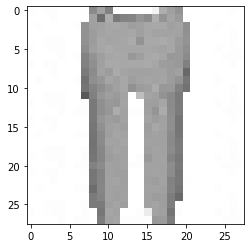

In [17]:
plt.imshow(img.convert('RGBA')) #вывод изображения
plt.show()

In [0]:
# Преобразуем изображение в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [0]:
prediction = model.predict(x) #запуск распознования

In [20]:
prediction #вывод содержания массива

array([[1.0100068e-21, 1.0000000e+00, 8.7208123e-26, 2.8795702e-13,
        2.6286416e-18, 7.7356313e-23, 6.0953166e-17, 2.8350649e-22,
        7.5056608e-26, 1.6137184e-25]], dtype=float32)

In [21]:
prediction = np.argmax(prediction) #выбор максимального значения
print("На изображении", types[prediction])

На изображении брюки
